In [9]:
import backtrader as bt
import pandas as pd

class Portfolio(bt.Strategy):
    def __init__(self):
        self.values = []  # 포트폴리오 가치 저장 리스트

    def start(self):
        # 초기 자본을 3개의 자산에 균등 분배하여 투자
        cash = self.broker.get_cash()
        size1 = cash / 3 / self.datas[0].close[0]
        size2 = cash / 3 / self.datas[1].close[0]
        size3 = cash / 3 / self.datas[2].close[0]

        self.buy(data=self.datas[0], size=size1)
        self.buy(data=self.datas[1], size=size2)
        self.buy(data=self.datas[2], size=size3)

    def next(self):
        if len(self.values) == 0:  # 첫 next()에서만 매수
            cash = self.broker.get_cash()
            size1 = cash / 3 / self.datas[0].close[0]
            size2 = cash / 3 / self.datas[1].close[0]
            size3 = cash / 3 / self.datas[2].close[0]

            self.buy(data=self.datas[0], size=size1)
            self.buy(data=self.datas[1], size=size2)
            self.buy(data=self.datas[2], size=size3)

        self.values.append(self.broker.getvalue())


In [10]:
import pandas as pd
import backtrader as bt
from datetime import datetime
from matplotlib import pyplot as plt

# 예시: 자산 1의 Pandas DataFrame
df1 = pd.read_csv('Brazil-6M.csv', parse_dates=True, index_col='Date')
df2 = pd.read_csv('brl_usd.csv', parse_dates=True, index_col='Date')
df3 = pd.read_csv('krw_usd.csv', parse_dates=True, index_col='Date')

# Cerebro 엔진에 데이터 추가
from_date = datetime(2024, 4, 1)  # 시작 날짜 (예시)
to_date = datetime(2025, 3, 28)  # 끝 날짜 (예시)

data1 = df1[(df1.index >= from_date) & (df1.index <= to_date)]
data2 = df2[(df2.index >= from_date) & (df2.index <= to_date)]
data3 = df3[(df3.index >= from_date) & (df3.index <= to_date)]


In [11]:

# Pandas DataFrame을 Backtrader Data Feed로 변환
data1 = bt.feeds.PandasData(dataname=data1)
data2 = bt.feeds.PandasData(dataname=data2)
data3 = bt.feeds.PandasData(dataname=data3)

cerebro = bt.Cerebro()
cerebro.addstrategy(Portfolio)
cerebro.adddata(data1)
cerebro.adddata(data2)
cerebro.adddata(data3)


In [12]:
# 초기 자본 설정
cerebro.broker.set_cash(10000)
# 전략을 추가하고 실행
results = cerebro.run()

In [13]:
strategy = results[0]

In [14]:
strategy.values

[10000.0,
 10000.0,
 10000.0,
 10011.701771982614,
 9994.684049326737,
 10007.084621362765,
 10005.435594067132,
 9984.98803302505,
 9974.236488284658,
 10012.888769696465,
 10024.59054167908,
 10040.553050416047,
 10033.866323568838,
 10051.477230561843,
 10073.20909281527,
 10117.13838738102,
 10157.258748464268,
 10224.40557992421,
 10274.556031278273,
 10239.663519519714,
 10234.648474384308,
 10240.650770190114,
 10225.605634783895,
 10202.189950417596,
 10192.159860146783,
 10165.44612118922,
 10145.385940647595,
 10122.168089233604,
 10156.270396154367,
 10166.164559928158,
 10128.718889583792,
 10137.359377446772,
 10105.597424922533,
 10077.168924031765,
 10063.795470337349,
 10064.784949618688,
 10091.531857007521,
 10142.25477918831,
 10142.584395935557,
 10132.554305664746,
 10077.082449069167,
 10060.365631951145,
 10034.377490165243,
 10051.094307283263,
 10053.732813860235,
 10057.07617728384,
 10056.020648845131,
 10047.662240286121,
 10057.292521950236,
 10070.66597564

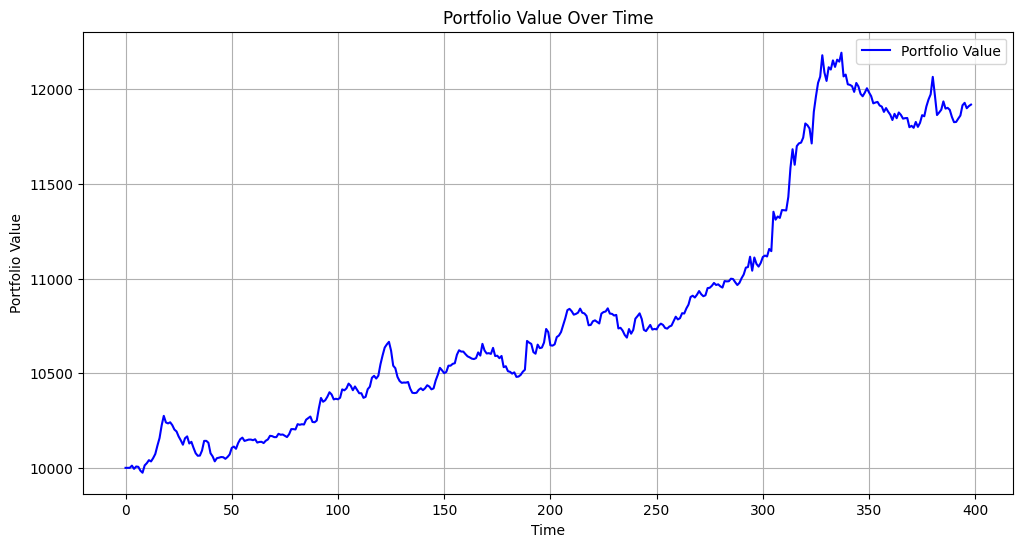

In [15]:
# ✅ 포트폴리오 가치 그래프 출력
plt.figure(figsize=(12, 6))
plt.plot(strategy.values, label="Portfolio Value", color="blue")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.legend()
plt.grid()
plt.show()

In [16]:
# 최종 자산 가치 출력
print(f'Final Portfolio Value: {cerebro.broker.getvalue()}')

Final Portfolio Value: 11918.461034151987
